# Classification - Class 2 - Neuronal Networks

## Author:  Ricardo Vallejo

## 1. Load Data

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# https://www.interactivechaos.com/manual/tutorial-de-machine-learning/perceptron-multicapa

tit = pd.read_csv("diabetes.csv")
display(tit)

print('DATA information:')
display(tit.info())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


DATA information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

# 2.  Identify Classes et Features


In [38]:
target_column='Outcome'

predictors = list(set(list(tit.columns))-set(target_column))
target = [target_column] #Classes

X = tit[predictors];
Y = tit[target];

display(X)
display(Y)


,BMI,Outcome,DPF,SkinThickness,Age,BloodPressure,Pregnancies,Insulin,Glucose
0,33.6,1,0.627,35,50,72,6,0,148
1,26.6,0,0.351,29,31,66,1,0,85
2,23.3,1,0.672,0,32,64,8,0,183
3,28.1,0,0.167,23,21,66,1,94,89
4,43.1,1,2.288,35,33,40,0,168,137
...,...,...,...,...,...,...,...,...,...
763,32.9,0,0.171,48,63,76,10,180,101
764,36.8,0,0.340,27,27,70,2,0,122
765,26.2,0,0.245,23,30,72,5,112,121
766,30.1,1,0.349,0,47,60,1,0,126


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## 2.1. Check the distribution or instances of any class

In [39]:
tit.groupby('Outcome').size() 

Outcome
0    500
1    268
dtype: int64

Outcome
0    500
1    268
dtype: int64


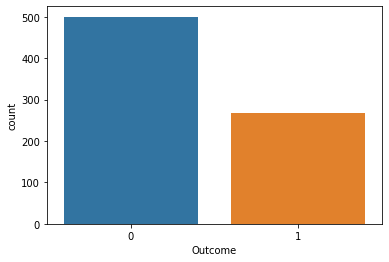

In [40]:
sns.countplot(tit['Outcome'],label="Count")
print(tit.groupby('Outcome').size())

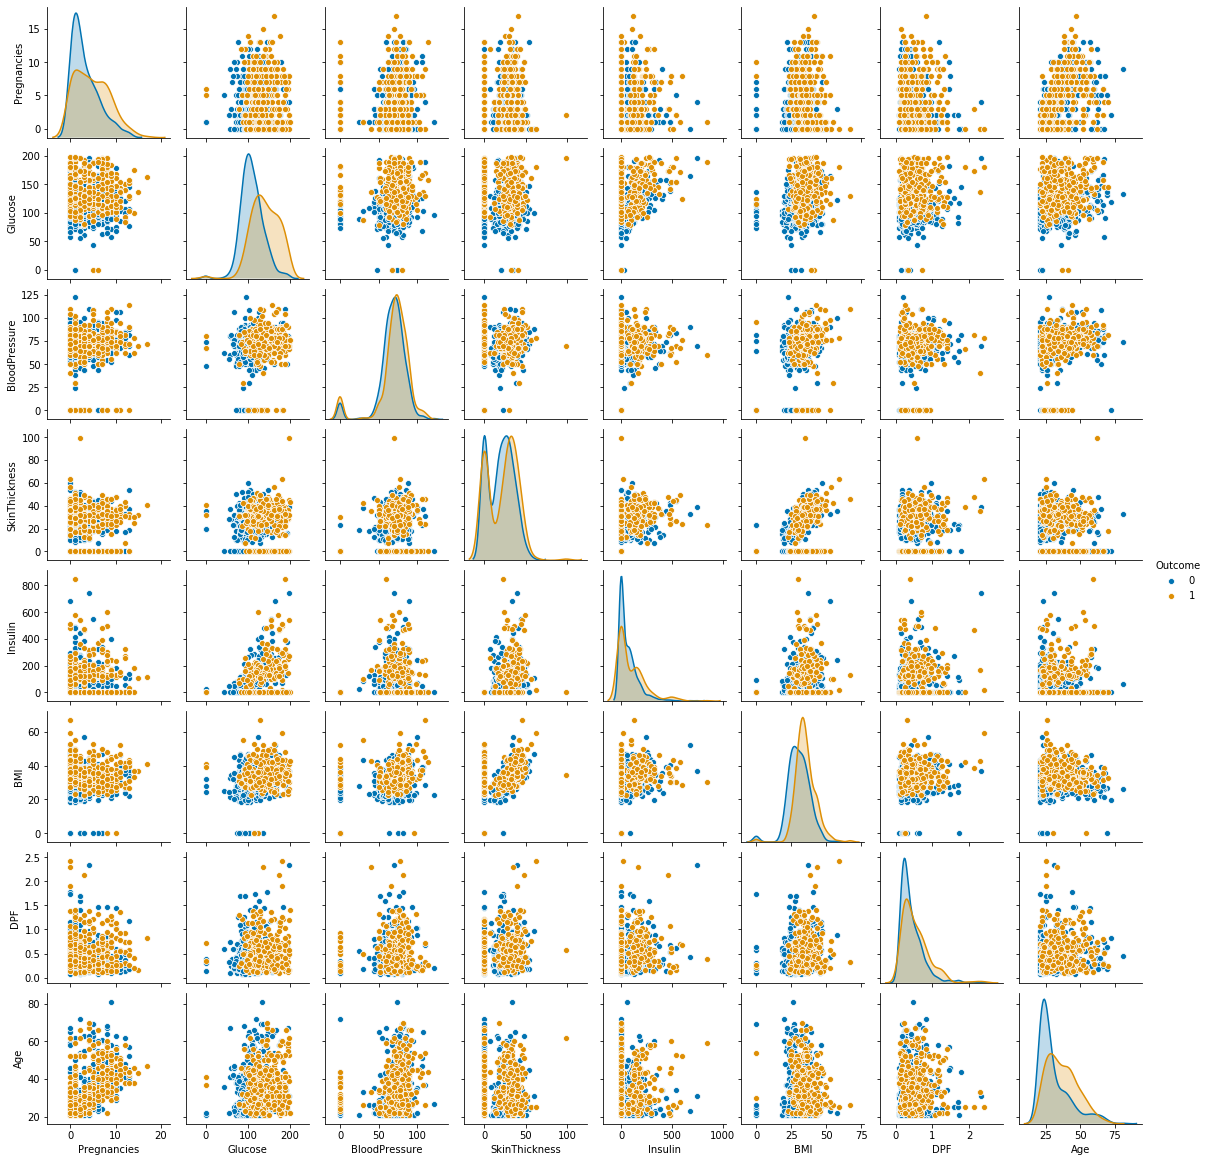

In [41]:
sns.pairplot(tit, hue="Outcome", height = 2, palette = 'colorblind');
plt.show()

In [42]:
tit[predictors].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00


## 2.2. Split data in Training Data and Test Data

In [43]:
# Repartition de donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(tit, test_size = 0.3, stratify = tit['Outcome'], random_state = 40)


In [44]:
print('Taille de la base d\'entreiment', train.shape[0]);
train.groupby('Outcome').size()


Taille de la base d'entreiment 537


Outcome
0    350
1    187
dtype: int64

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 160 to 224
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    537 non-null    int64  
 1   Glucose        537 non-null    int64  
 2   BloodPressure  537 non-null    int64  
 3   SkinThickness  537 non-null    int64  
 4   Insulin        537 non-null    int64  
 5   BMI            537 non-null    float64
 6   DPF            537 non-null    float64
 7   Age            537 non-null    int64  
 8   Outcome        537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.0 KB


In [46]:
test.groupby('Outcome').size()


Outcome
0    150
1     81
dtype: int64

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 144 to 596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    231 non-null    int64  
 1   Glucose        231 non-null    int64  
 2   BloodPressure  231 non-null    int64  
 3   SkinThickness  231 non-null    int64  
 4   Insulin        231 non-null    int64  
 5   BMI            231 non-null    float64
 6   DPF            231 non-null    float64
 7   Age            231 non-null    int64  
 8   Outcome        231 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.0 KB


## 2.3 Creation de matrices des characteristiques


In [48]:
X_train = train[predictors]
Y_train = train[target_column]

X_test = test[predictors]
Y_test = test[target_column]


# 3.  Development classification model - Neural Network

In [65]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation = "tanh", solver='adam', max_iter=300)

model.fit(X_train, Y_train)


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 3.1.  Prediction et performance

In [66]:
from sklearn.metrics import accuracy_score

Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)
accuracy_score(Y_train, Y_predicted_train)

0.7672253258845437

In [67]:
# Model has good level of confidence.

### Performance evaluation with confusion_matrix on test data and training data

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_train, Y_predicted_train))


[[270  80]
 [ 45 142]]


In [69]:
# Total data: 768
# Training data (60%) : 537
# From 537 data 317+81= 398 was good classified.  
# La class 0 Outcome has more classification errors than class 1.


In [70]:
print(confusion_matrix(Y_test, Y_predicted_test))

[[105  45]
 [ 23  58]]


In [71]:
# For data test almost 50% of data was bad classified for class 1. 20/42  
# For data test almost 30% of data was bad classified for class 1. 59/189  

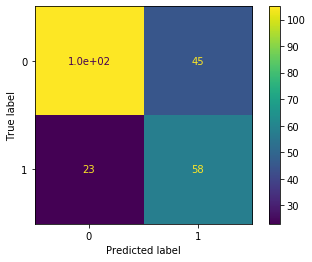

In [72]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, Y_test)
plt.show()

##  increasing number of iteration to 700, on a classification perfect.

In [78]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation = "tanh", solver='adam', max_iter=700)

model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

Y_predicted_train = model.predict(X_train)
Y_predicted_test = model.predict(X_test)
accuracy_score(Y_train, Y_predicted_train)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_predicted_test))


[[150   0]
 [  0  81]]


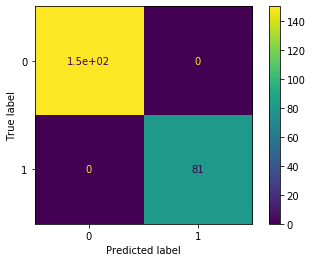

In [79]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, Y_test)
plt.show()